# Analysis of the UN's World Happiness Index with machine learning

Maaike de Jong  
June 2020  
  
See the repository's [README](https://github.com/maaikedj/happiness-machine-learning/blob/master/README.md) file for background and details on the analysis and data.  

### Notebook 2: data exploration and cleaning
In this notebook I explore, clean and transform the data for further analysis. 
  

In [1]:
# import packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# import data resulting from previous notebook

df = pd.read_csv('dfML.csv')
df.head()

,Country,Region,Score mean,Access to electricity (% of population),CO2 emissions (metric tons per capita),"Compulsory education, duration (years)",GDP growth (annual %),GDP per capita (current US$),Individuals using the Internet (% of population),Land area (sq. km),...,Population density (people per sq. km of land area),Population growth (annual %),Proportion of seats held by women in national parliaments (%),Refugee population by country or territory of origin,"Population, total",Renewable energy consumption (% of total final energy consumption),"School enrollment, primary (gross), gender parity index (GPI)",Terrestrial protected areas (% of total land area),Urban population (% of total population),Refugees country of origin (% of total population
0,Switzerland,Western Europe,7.5114,100.0,4.732688,11.000000,1.956542,82645.581204,86.791615,3.951600e+04,...,207.041205,1.052495,30.800,15.000000,8.181440e+06,22.946425,0.996315,9.660123,73.697333,0.000002
1,Iceland,Western Europe,7.5110,100.0,5.921191,10.000000,2.998990,55453.949873,96.981917,1.002500e+05,...,3.293207,1.133978,41.440,2.833333,3.301440e+05,76.467214,0.999472,17.914355,93.675778,0.000009
2,Denmark,Western Europe,7.5460,100.0,7.003336,9.888889,1.778116,58721.482142,94.347397,4.208778e+04,...,134.484524,0.531352,38.311,7.750000,5.659816e+06,27.220085,0.991766,17.921347,87.377222,0.000001
3,Norway,Western Europe,7.5410,100.0,10.416053,10.000000,1.560165,87977.602660,95.537903,3.651633e+05,...,14.024149,1.059666,39.903,10.000000,5.121086e+06,57.320681,1.000233,17.060995,80.678222,0.000002
4,Canada,North America,7.3506,100.0,15.234180,10.000000,2.207759,48056.677329,86.422500,9.093510e+06,...,3.897680,1.078803,25.365,93.222222,3.544359e+07,22.181059,1.006599,9.687049,81.209556,0.000003


In [51]:
# check whether the columns are the right data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 23 columns):
Country                                                                   161 non-null object
Region                                                                    161 non-null object
Score mean                                                                161 non-null float64
Access to electricity (% of population)                                   161 non-null float64
CO2 emissions (metric tons per capita)                                    159 non-null float64
Compulsory education, duration (years)                                    153 non-null float64
GDP growth (annual %)                                                     159 non-null float64
GDP per capita (current US$)                                              160 non-null float64
Individuals using the Internet (% of population)                          161 non-null float64
Land area (sq. km)                        

In [52]:
# Check for missing values

df.isnull().sum()

Country                                                                   0
Region                                                                    0
Score mean                                                                0
Access to electricity (% of population)                                   0
CO2 emissions (metric tons per capita)                                    2
Compulsory education, duration (years)                                    8
GDP growth (annual %)                                                     2
GDP per capita (current US$)                                              1
Individuals using the Internet (% of population)                          0
Land area (sq. km)                                                        2
Life expectancy at birth, total (years)                                   0
PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)    2
People using at least basic drinking water services (% of population)     1
Population d

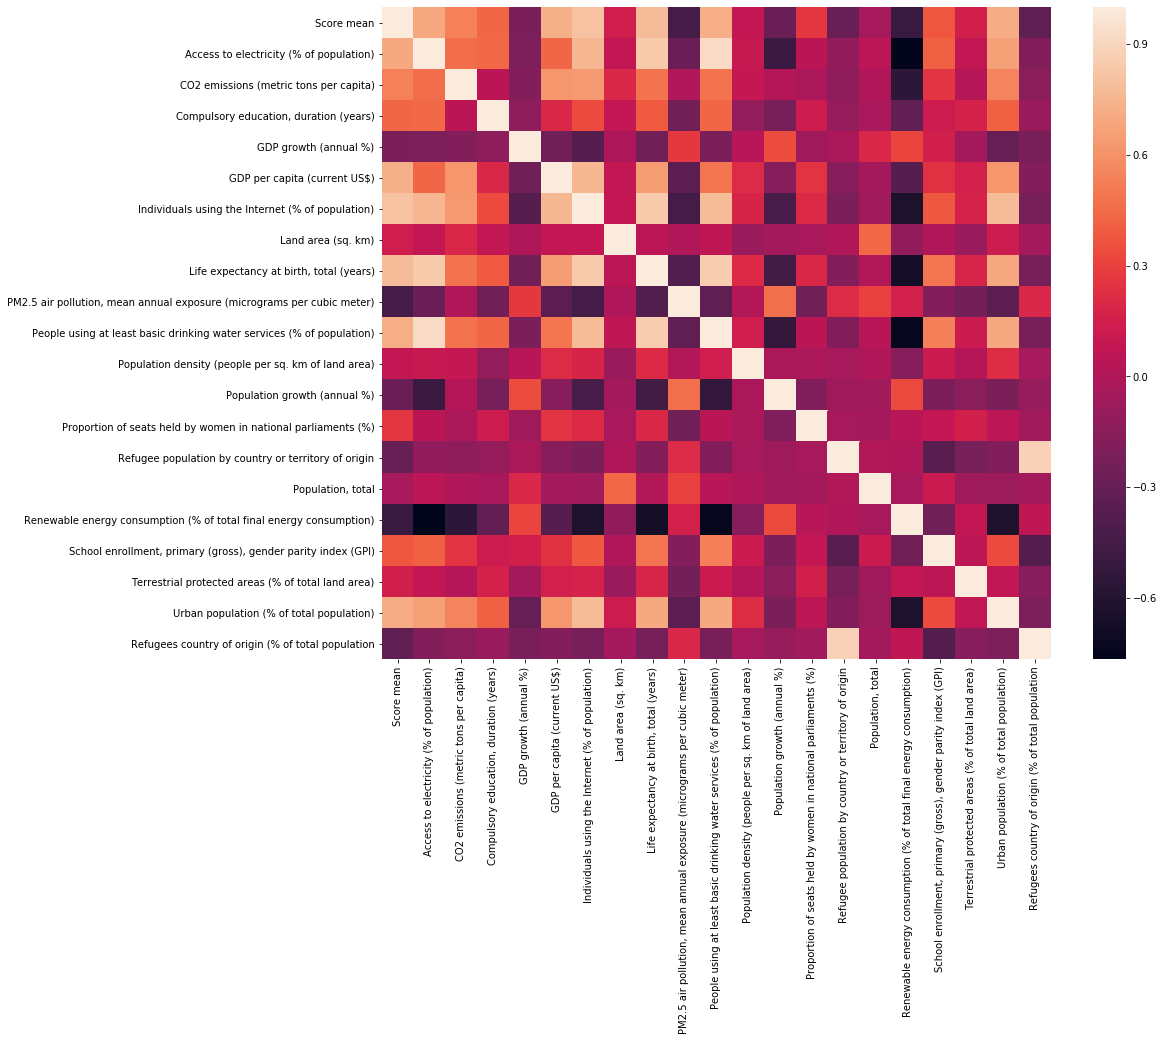

In [58]:
# check whether variables are correlated with heatmap

corr = df.corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr)

In [59]:
# remove columns that have high correlations with other columns or are redundant:

# Country
# Region
# Access to electricity (% of population)
# Refugee population by country or territory of origin
# Population, total

df2 = df.drop(['Country', 'Region', 'Access to electricity (% of population)', 'Refugee population by country or territory of origin', 'Population, total'], axis=1)
df2.head()

,Score mean,CO2 emissions (metric tons per capita),"Compulsory education, duration (years)",GDP growth (annual %),GDP per capita (current US$),Individuals using the Internet (% of population),Land area (sq. km),"Life expectancy at birth, total (years)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",People using at least basic drinking water services (% of population),Population density (people per sq. km of land area),Population growth (annual %),Proportion of seats held by women in national parliaments (%),Renewable energy consumption (% of total final energy consumption),"School enrollment, primary (gross), gender parity index (GPI)",Terrestrial protected areas (% of total land area),Urban population (% of total population),Refugees country of origin (% of total population
0,7.5114,4.732688,11.000000,1.956542,82645.581204,86.791615,3.951600e+04,83.026287,11.656622,100.000000,207.041205,1.052495,30.800,22.946425,0.996315,9.660123,73.697333,0.000002
1,7.5110,5.921191,10.000000,2.998990,55453.949873,96.981917,1.002500e+05,82.454472,7.178653,99.999999,3.293207,1.133978,41.440,76.467214,0.999472,17.914355,93.675778,0.000009
2,7.5460,7.003336,9.888889,1.778116,58721.482142,94.347397,4.208778e+04,80.440108,11.047112,99.999999,134.484524,0.531352,38.311,27.220085,0.991766,17.921347,87.377222,0.000001
3,7.5410,10.416053,10.000000,1.560165,87977.602660,95.537903,3.651633e+05,81.969919,7.697953,100.000000,14.024149,1.059666,39.903,57.320681,1.000233,17.060995,80.678222,0.000002
4,7.3506,15.234180,10.000000,2.207759,48056.677329,86.422500,9.093510e+06,81.732249,7.558178,99.353377,3.897680,1.078803,25.365,22.181059,1.006599,9.687049,81.209556,0.000003


In [60]:
# drop rows with missing values

df3 = df2.dropna()

In [61]:
# check missing values again

df3.isnull().sum()

Score mean                                                                0
CO2 emissions (metric tons per capita)                                    0
Compulsory education, duration (years)                                    0
GDP growth (annual %)                                                     0
GDP per capita (current US$)                                              0
Individuals using the Internet (% of population)                          0
Land area (sq. km)                                                        0
Life expectancy at birth, total (years)                                   0
PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)    0
People using at least basic drinking water services (% of population)     0
Population density (people per sq. km of land area)                       0
Population growth (annual %)                                              0
Proportion of seats held by women in national parliaments (%)             0
Renewable en

In [62]:
# rename remaining columns for easier use and plotting

df_clean = df3.rename(columns = {'Score mean': 'Happiness score',
                            'CO2 emissions (metric tons per capita)': 'CO2 emission per capita',
                            'Compulsory education, duration (years)': 'Compulsory education (years)',
                            'GDP per capita (current US$)': 'GDP per capita',
                            'Individuals using the Internet (% of population)': 'Internet use (% of population)',
                            'Land area (sq. km)': 'Land area',
                            'Life expectancy at birth, total (years)': 'Life expectancy',
                            'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)': 'Air pollution',
                            'People using at least basic drinking water services (% of population)': 'Drinking water services',
                            'Population density (people per sq. km of land area)': 'Population density',
                            'Population growth (annual %)': 'Population growth',
                            'Proportion of seats held by women in national parliaments (%)': 'Women in parliament %',
                            'Renewable energy consumption (% of total final energy consumption)': 'Renewable energy %',
                            'School enrollment, primary (gross), gender parity index (GPI)': 'Gender parity index (GPI)',
                            'Terrestrial protected areas (% of total land area)': 'Protected land %',
                            'Urban population (% of total population)': 'Urban population',
                            'Refugees country of origin (% of total population': 'Refugees %'})

In [64]:
list(df_clean.columns)

['Happiness score',
 'CO2 emission per capita',
 'Compulsory education (years)',
 'GDP growth (annual %)',
 'GDP per capita',
 'Internet use (% of population)',
 'Land area',
 'Life expectancy',
 'Air pollution',
 'Drinking water services',
 'Population density',
 'Population growth',
 'Women in parliament %',
 'Renewable energy %',
 'Gender parity index (GPI)',
 'Protected land %',
 'Urban population',
 'Refugees %']

In [67]:
# save clean data frame for future use:

df_clean.to_csv('dfML_clean.csv', index = False)

### Visual data exploration

Visualise distribution of variables with histogram and boxplot, and their relation with Happiness score with scatterplot

In [68]:
# define function for figures

def figure(col_name):
    
    x = df_clean['Happiness score']

    fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(15,4))

    ax1.boxplot(df_clean[col_name])
    
    ax2.hist(df_clean[col_name])

    ax3.scatter(x, df_clean[col_name])
    
    fig.suptitle(col_name, fontsize=16)

    return plt.show()

In [79]:
# define function for figures with log scale for the variable (y)

def figure_log(col_name):
    
    x = df_clean['Happiness score']

    fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(15,4))

    ax1.boxplot(df_clean[col_name])
    ax1.set_yscale('log') 
    
    ax2.hist(df_clean[col_name])
    ax2.set_yscale('log') 

    ax3.scatter(x, df_clean[col_name])
    ax3.set_yscale('log') 
    
    fig.suptitle(col_name + ' log scale', fontsize=16)

    return plt.show()

In [ ]:
# df summary stats

df_clean.describe()

In [ ]:
figure('CO2 emission per capita')

# data very skewed

In [ ]:
# on log scale

figure_log('CO2 emission per capita')

# improved but not great

In [ ]:
figure('Compulsory education (years)')

In [ ]:
figure('GDP growth (annual %)')

In [ ]:
figure('GDP per capita')

# very skewed

In [ ]:
# on a log scale

figure_log('GDP per capita')

In [ ]:
figure('Internet use (% of population)')

In [ ]:
figure('Land area')

In [ ]:
# on a log scale

figure_log('Land area')

In [ ]:
figure('Life expectancy')

In [ ]:
figure('Air pollution')

In [ ]:
# on a log scale

figure_log('Air pollution')

In [ ]:
figure('Drinking water services')

In [ ]:
# on a log scale

figure_log('Drinking water services')

In [ ]:
figure('Population density')

In [ ]:
# on a log scale

figure_log('Population density')

In [ ]:
figure('Population growth')

In [ ]:
figure('Women in parliament %')

In [ ]:
figure('Renewable energy %')

In [ ]:
figure('Gender parity index (GPI)')

In [ ]:
# on a log scale

figure_log('Gender parity index (GPI)')

In [ ]:
figure('Protected land %')

In [ ]:
figure('Urban population')

In [ ]:
figure('Refugees %')

In [ ]:
# on a log scale

figure_log('Refugees %')

In [104]:
# make df with several variables log transformed
# first make copy of df_clean
df_clean_tr = df_clean.copy()

In [105]:
# perform log transformation on selected variables:

log_columns = ['CO2 emission per capita', 'GDP per capita', 'Land area', 'Air pollution', 'Population density', 'Drinking water services', 'Population density', 'Gender parity index (GPI)', 'Refugees %']

for col in log_columns:
    df_clean_tr[col] = np.log10(df_clean_tr[col])

In [106]:
# rename log transformed columnn

for col in log_columns:
    df_clean_tr.rename(columns = {col: col + ' log'}, inplace = True)

In [107]:
df_clean_tr.head()

,Happiness score,CO2 emission per capita log,Compulsory education (years),GDP growth (annual %),GDP per capita log,Internet use (% of population),Land area log,Life expectancy,Air pollution log,Drinking water services log,Population density log,Population growth,Women in parliament %,Renewable energy %,Gender parity index (GPI) log,Protected land %,Urban population,Refugees % log
0,7.5114,0.675108,11.000000,1.956542,4.917220,86.791615,4.596773,83.026287,1.066573,2.000000,0.364749,1.052495,30.800,22.946425,-0.001603,9.660123,73.697333,-5.736739
1,7.5110,0.772409,10.000000,2.998990,4.743932,96.981917,5.001084,82.454472,0.856043,2.000000,-0.285990,1.133978,41.440,76.467214,-0.000229,17.914355,93.675778,-5.066406
2,7.5460,0.845305,9.888889,1.778116,4.768797,94.347397,4.624156,80.440108,1.043249,2.000000,0.328109,0.531352,38.311,27.220085,-0.003591,17.921347,87.377222,-5.863501
3,7.5410,1.017703,10.000000,1.560165,4.944372,95.537903,5.562487,81.969919,0.886375,2.000000,0.059517,1.059666,39.903,57.320681,0.000101,17.060995,80.678222,-5.709362
4,7.3506,1.182819,10.000000,2.207759,4.681754,86.422500,6.958732,81.732249,0.878417,1.997183,-0.228555,1.078803,25.365,22.181059,0.002856,9.687049,81.209556,-5.580018


In [108]:
# save clean data with transformed variables for future use:

df_clean_tr.to_csv('dfML_clean_tr.csv', index = False)